# Stat 504 HW 3

Note: For Data Set #2 (reviews_Musical_Instruments.json), please download the file here: https://dl.dropboxusercontent.com/u/102059479/reviews_Musical_Instruments.json

In [124]:
# import modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn import datasets
from sklearn.feature_selection import RFE
import time
%matplotlib inline

# Data set #1: Recidivism

In [125]:
# read the crime data into a DataFrame
dta = pd.read_csv('http://www.webpages.uidaho.edu/~stevel/504/STRONG-R%20Male%20Sample_Reduced_2014-03-14.csv', header=0)
dta.shape

(39155, 341)

In [126]:
# remove FelRecidYr2 equals to null, and save as a newdta (ndta)
ndta = dta[dta.FelRecidYr3 != ' ']
ndta.shape

(21373, 341)

In [127]:
ndta.head()

,AgeAsses3RN,AgeAtFirstConvR,JvFelCon,JvVioCon,JvComit,HomConv,SexConv,VProCon,AssaCon,DomVio,...,CopFodNd3,CopBugNd3,CopTraNd3,CopHygNd3,CopMedNd3,CopMHNd3,FelRecidYr3,Unnamed: 338,Unnamed: 339,Unnamed: 340
0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,NaN,NaN,NaN
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [128]:
# list all field names
list(ndta.columns.values)

['AgeAsses3RN',
 'AgeAtFirstConvR',
 'JvFelCon',
 'JvVioCon',
 'JvComit',
 'HomConv',
 'SexConv',
 'VProCon',
 'AssaCon',
 'DomVio',
 'FelWeap',
 'FelProp',
 'DrugCon',
 'EscpCon',
 'MisAssa',
 'MisdDom',
 'MisdSex',
 'MisDomNV',
 'MisWeap',
 'MisdProp',
 'MisdDrug',
 'MisdEscp',
 'MisAlcoh',
 'TotalAdultFelonies',
 'LastConviction',
 'TechVioPriorsR',
 'CountInfracR',
 'CountVioInfracR',
 'CountInfracEverR',
 'CountVioInfracEverR',
 'SeriousInfrac',
 'SeriousInfracEver',
 'SexInfrac',
 'SexInfracEver',
 'STGStatus',
 'YearlyVisitsMR',
 'RelToSuperFromD',
 'CChangeCurrRN',
 'IJVVocationalCurrRC',
 'StressAngerMngmtEverR',
 'StressAngerMngmtCurrR',
 'SexOffTreatEverR',
 'SexOfftreatCurrR',
 'EduGdCom3N',
 'EDQuitExpell',
 'EduAcdMot3N',
 'EmpLeng3R',
 'EmpJobSk3',
 'EmInSou3RC',
 'EmpMonIn3',
 'EmHeRC',
 'EmpSta3RC',
 'EmPbNone3R',
 'EmPbPPA3',
 'EmPbPr3',
 'EmPbAnti3',
 'EmPbUn3',
 'EmBrNone3R',
 'EmBrSS3',
 'EmBrEdu3',
 'EmBrPS3',
 'EmBrNEx3',
 'EmBrPWH3',
 'EmBrLM3',
 'EmBrCCI3',
 'E

In [129]:
# add "record" column: 1 represents having FelRecidYr3 == 1, 0 represents not
# Note: dfmi.loc[:,('one','second')] from http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
ndta.loc[:,('record')] = (ndta.FelRecidYr3 == '1').astype(int)
# list two columns and their types
print ndta.record.dtype
print ndta.FelRecidYr3.dtype

int32
object


## Feature Selection (LogisticRegression) - 7 min

We will select the first 100 attributes with the highest rank by the logistic regression method

In [130]:
# load the dataset
X = ndta.loc[:,"AgeAsses3RN":"CopMHNd3"]
y = ndta["record"]
names = list(ndta.dtypes.index)

In [17]:
start = time.time()
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 100 attributes
rfe = RFE(model, 100)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
end = time.time()
fs_time = end - start
print "duration: %fs" % (fs_time)

[ True False False  True  True  True False False False False False False
 False False False  True False False  True False False  True False  True
  True False False False False False  True False  True  True  True  True
  True False False  True  True False False False False False False False
  True False  True False False False False False False False False False
  True False False False  True False False False False  True False  True
  True False False False False  True False  True False False False False
  True False False False False False False False False  True  True  True
  True False False False False  True  True False  True False False False
 False False False False False False  True  True  True  True False  True
 False False  True False  True  True False False  True False False False
  True False  True  True  True False False  True False False False  True
 False False False False  True  True  True False False False  True  True
  True False  True False  True  True False False Fa

In [18]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names), reverse=False)

Features sorted by their rank:
[(1.0, 'AgChFrSe3'), (1.0, 'AgChFxUR3'), (1.0, 'AgChPACh3'), (1.0, 'AgChThr3'), (1.0, 'AgeAsses3RN'), (1.0, 'Alcoh6m3'), (1.0, 'AtChCHea3'), (1.0, 'AtMoMat3'), (1.0, 'AtMoSex3'), (1.0, 'AtRsCrUs3'), (1.0, 'AtRsL63R'), (1.0, 'AtRsNBR3'), (1.0, 'AttAuth3'), (1.0, 'CopFodNd3'), (1.0, 'DrgHstPr3'), (1.0, 'DrgRImDE3'), (1.0, 'DrgRImIV3'), (1.0, 'DrgRImMH3'), (1.0, 'DrgRImPF3'), (1.0, 'DrgSuFRx3'), (1.0, 'DrgSuGD3'), (1.0, 'DrgSuGP3'), (1.0, 'DrgSuII3'), (1.0, 'DrgSuPC3'), (1.0, 'DrgSuPrs3'), (1.0, 'EmBrCCI3'), (1.0, 'EmBrHyg3'), (1.0, 'EmBrOth3'), (1.0, 'EmBrPS3'), (1.0, 'EmBrPunc3'), (1.0, 'EmFiNRCS3R'), (1.0, 'EmFiPSCS3'), (1.0, 'EmHeRC'), (1.0, 'EmInSou3RC'), (1.0, 'FPACfEst3'), (1.0, 'FPACfODV3'), (1.0, 'FPACfTPA3'), (1.0, 'FPAHpCon3R'), (1.0, 'FPAHpEst3'), (1.0, 'FPAHpHos3'), (1.0, 'FPAInEst3'), (1.0, 'FPAInMin3'), (1.0, 'FPAInNo3'), (1.0, 'FPAInPos3R'), (1.0, 'FPAInSep3'), (1.0, 'FPAPbAl3'), (1.0, 'FPAPbAnt3'), (1.0, 'FPAPbCrm3'), (1.0, 'FamCfDV3'), (1.0

In [131]:
# Select the top ranking features
selectedVar = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names), reverse=True)
selectedFeatures = [x[1] for x in selectedVar[:100]]
print selectedFeatures

['AgeUse3', 'FamMinCh3', 'CopMHNd3', 'AgChPAUk3', 'AtChPara3', 'EmBrPWH3', 'AgChViOb3', 'EmBrEdu3', 'ResOcSp3', 'AtChCrDi3', 'ResCuPri3', 'FamPrAl3', 'CopHygNd3', 'EmpJobSk3', 'AtChSup3', 'EmBrNone3R', 'MisdProp', 'ALUse3', 'SexOffTreatEverR', 'SexOfftreatCurrR', 'EduGdCom3N', 'AgChNoEv3R', 'MisDomNV', 'FPACfPDV3', 'FPACfSom3', 'EmBrDx3', 'EmFiNoIn3', 'TechVioPriorsR', 'DrgHImCC3', 'EmpSta3RC', 'AgChRnVi3', 'EmFiSDx3', 'DrugUse3', 'CountVioInfracEverR', 'AgMoExci3', 'AgMoAcGo3', 'AgChDVPa3', 'MisdSex', 'VProCon', 'AtMoRet3', 'DealOth3', 'AtRsDCoR3', 'FPACfVeb3', 'DxProNvC3', 'OffChild3RC', 'DrgHImDE3', 'AtMoExc3', 'AggBehOg3', 'AtChDecS3', 'LongMarr3R', 'NumMarr3R', 'AgChPAFe3', 'AgChPAAd3', 'BelfSuc3', 'RespOth3', 'FrnAntSo3', 'FPAHpNWH3', 'FamMCUnk3', 'AggWeap3RC', 'AgChDVFm3', 'AtChFelS3', 'AtChTact3', 'EmPbPPA3', 'EmBrNEx3', 'EmPbUn3', 'EmBrDD3', 'IJVVocationalCurrRC', 'ResOcNo3', 'DrgHImIV3', 'DrgRImCC3', 'ResOcMot3', 'MisdDrug', 'AgMoEVNo3R', 'FrnWilHp3R', 'EduAcdMot3N', 'FamMCSR

In [132]:
# split the new DataFrame into training and testing sets
X = ndta.loc[:,selectedFeatures]
y = ndta["record"]
names = list(ndta.dtypes.index)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Model hyper-parameters optimization

### tuning n_neighbor for KNN

In [21]:
# 10-fold cross-validation with K=18 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores1 = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

In [22]:
print scores1

[ 0.69176801  0.70533209  0.696913    0.68615529  0.68788021  0.67805335
  0.66682265  0.61394478  0.62938699  0.6488764 ]


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'n_neighbors': 1}
[ 0.6272217   0.66417212  0.6585594   0.65247895  0.65839963  0.6335985
  0.64061769  0.57978474  0.5741694   0.58988764]
0.62789500772
[0.6278950077200206, 0.67861320357460342, 0.65727787395311843, 0.6846020680297572, 0.67051887895943485, 0.68689468020399569, 0.67847283956393578, 0.68853226032845183, 0.68488279605109248, 0.69330463669115239, 

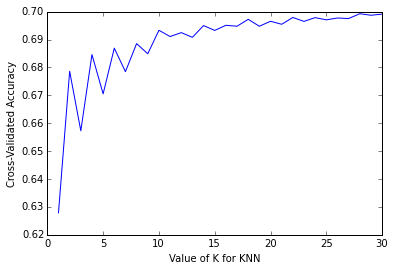

In [23]:
start = time.time()
# define the parameter values that should be searched
k_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
knn_time = end - start
print "duration: %fs" % (knn_time)

In [24]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.699246713143
{'n_neighbors': 28}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=28, p=2, weights='uniform')


### tuning C for Logistic Regression

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'C': 1}
[ 0.71936389  0.71936389  0.71515435  0.70860617  0.72204024  0.70285447
  0.72297613  0.65325222  0.64763687  0.68398876]
0.699527441164
[0.6995274411640855, 0.69962101717119729, 0.69971459317830909, 0.69966780517475324, 0.69976138118186493, 0.69976138118186493, 0.699761381181864

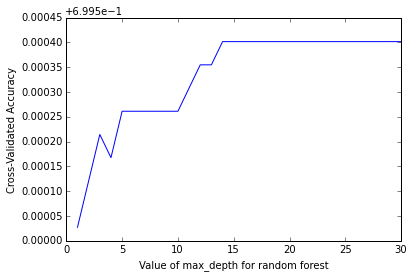

In [51]:
start = time.time()

model = LogisticRegression()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of C for Logistic Regression')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
logi_time = end - start
print "duration: %fs" % (logi_time)

In [53]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.699901745193
{'C': 14}
LogisticRegression(C=14, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


### tuning max_depth for Classification Tree

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=1, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'max_depth': 1}
[ 0.66651076  0.6950421   0.6950421   0.6950421   0.69536734  0.67898924
  0.69536734  0.6499766   0.65278428  0.66432584]
0.678847143592
[0.67884714359238296, 0.70757497777569833, 0.70322369344500069, 0.70041641323164738, 0.69774949702896183, 0.69597155289383805, 0.69293033266270532, 0.68745613624666635, 0.682356243859

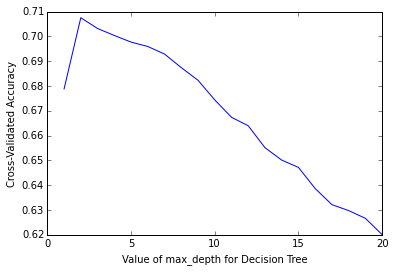

In [26]:
start = time.time()

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 21)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of max_depth for Classification Tree')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
tree_time = end - start
print "duration: %fs" % (tree_time)

In [27]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.707574977776
{'max_depth': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=1, splitter='best')


### tuning n_estimators for Random Forest

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'n_estimators': 1}
[ 0.61272217  0.63985033  0.64405987  0.61880262  0.64950866  0.62798315
  0.63640618  0.56855405  0.5629387   0.57631086]
0.613

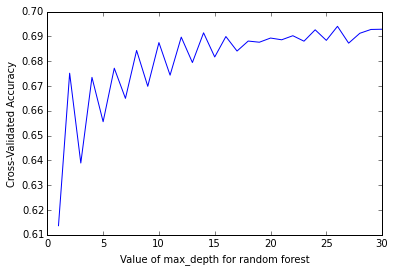

In [30]:
start = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Random Forest')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
forest_time = end - start
print "duration: %fs" % (forest_time)

In [31]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.694100032752
{'n_estimators': 26}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### tuning n_estimators for Boosted Trees

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'n_estimators': 1}
[ 0.66651076  0.6950421   0.6950421   0.6950421   0.69536734  0.67898924
  0.69536734  0.6499766   0.65278428  0.66432584]
0.678847143592
[0.67884714359238296, 0.70757497777569833, 0.70537594160857153, 0.7015393253169887, 0.70429981752678616, 0.69517615683338796, 0.69980816918542088, 0.69994853319608852, 0.70050998923875918, 0.70088429326720625, 0.701165021

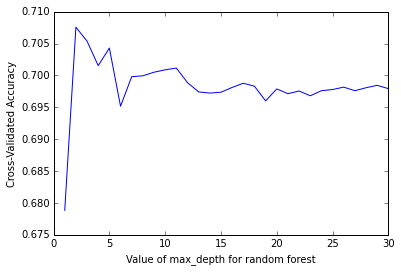

In [34]:
start = time.time()

model = AdaBoostClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Boosted Trees')
plt.ylabel('Cross-Validated Accuracy')

boost_time = end - start
print "duration: %fs" % (boost_time)

In [35]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.707574977776
{'n_estimators': 2}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=2, random_state=None)


### tuning degree for SVM Polynomial Kernel

In [140]:
# 10-fold cross-validation with degree=3 for SVM Poly
svcpoly = SVC(kernel='poly', probability=True, degree=3)
scores = cross_val_score(svcpoly, X_train, y_train, cv=10, scoring='accuracy')
print scores

[ 0.70679975  0.71241422  0.7099189   0.69931379  0.71179039  0.7099189
  0.69993762  0.70555209  0.7099189   0.71098627]


In [141]:
# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

0.70765508336


In [148]:
# search for an optimal value of degree for SVM Polynomial Kernel
para_range = range(1, 21)
svcpoly_scores = []
for para in para_range:
    svcpoly = SVC(kernel='poly', probability=True, degree=para)
    scores = cross_val_score(svcpoly, X_train, y_train, cv=10, scoring='accuracy')
    svcpoly_scores.append(scores.mean())
print svcpoly_scores

[0.69187100808954505, 0.70728086305094306, 0.70765508336039717, 0.70721840213768972, 0.70653187726196898, 0.70615769589323396, 0.7059703520941929, 0.70590793012165876, 0.7056584369351161, 0.70416112734939085, 0.70422351038120623, 0.70391155628141067, 0.70341249202688771, 0.70378682915849888, 0.70397386143178797, 0.70328749231894316, 0.70253877911500218, 0.70185225423928144, 0.70154022225804769, 0.70197686454003616]


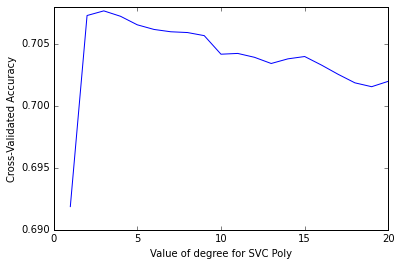

In [149]:
# plot the value of degree for SVM Polynomial Kernel (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(para_range, svcpoly_scores)
plt.xlabel('Value of degree for SVC Poly')
plt.ylabel('Cross-Validated Accuracy')

So we choose degree = 3 for the SVM Ploynomial Kernel.

# ROC and AUC

AUC for Multinomial Naive Bayes: 0.674141	duration: 0.058000
AUC for Gaussian Naive Bayes: 	0.674141	duration: 0.032000
AUC for K-nearest Neighbors: 	0.680614	duration: 39.389000
AUC for Logistic Regression: 	0.699838	duration: 0.266000
AUC for SVM Polynomial Kernel: 	0.679424	duration: 163.714000
AUC for SVM Gaussian Kernel: 	0.681183	duration: 207.322000
AUC for Classification Tree: 	0.624381	duration: 0.063000
AUC for Bagging: 		0.679540	duration: 70.935000
AUC for Random Forest: 		0.693678	duration: 0.875000
AUC for Boosted Trees: 		0.624381	duration: 0.093000


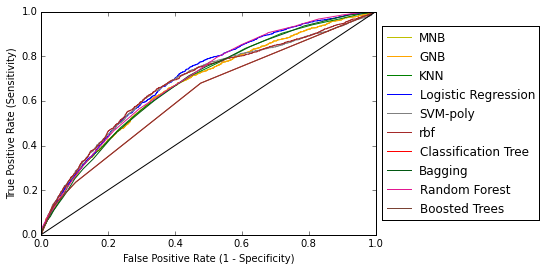

In [134]:
# Define a function to calculate AUC and plot ROC
def rocauc(method):
    global duration
    duration = 0
    start = time.time()
    # tit = 'ROC, feature=\'text\''
    if method == "reg":        
        model = LogisticRegression(C=14)
        tag = 'Logistic Regression'; col = 'b'
    elif method == "nb":        
        model = MultinomialNB()
        tag = 'MNB'; col = 'y'
    elif method == "gnb":        
        model = MultinomialNB()
        tag = 'GNB'; col = 'orange'
    elif method == "knn":        
        model = KNeighborsClassifier(n_neighbors=28)
        tag = 'KNN'; col = 'g'
    elif method == "tree":
        model = DecisionTreeClassifier(max_depth=2, random_state=1)
        tag = 'Classification Tree'; col = 'r'
    elif method == "svm-poly":
        model = SVC(kernel='poly', probability=True, degree=3)
        tag = 'SVM-poly'; col = 'grey'
    elif method == "rbf":
        model = SVC(kernel='rbf', probability=True)
        tag = 'rbf'; col = 'brown'
    elif method == "bagging":
        model = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
        tag = 'Bagging'; col = '#015812'
    elif method == "forest":
        model = RandomForestClassifier(n_estimators=26)
        tag = 'Random Forest'; col = '#e21790'
    elif method == "boosted":
        model = AdaBoostClassifier(n_estimators=2)
        tag = 'Boosted Trees'; col = '#7a4234'
    # AUC values
    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # ROC plot
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=tag, color=col)
    plt.legend(loc='lower right')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5), numpoints = 1)
    # time calculate
    end = time.time()
    duration = end - start
    # plt.title('ROC curves')
    return metrics.roc_auc_score(y_test, y_pred_prob)

print "AUC for Multinomial Naive Bayes: %f\tduration: %f" % (rocauc("nb"), duration)
print "AUC for Gaussian Naive Bayes: \t%f\tduration: %f" % (rocauc("gnb"), duration)
print "AUC for K-nearest Neighbors: \t%f\tduration: %f" % (rocauc("knn"), duration)
print "AUC for Logistic Regression: \t%f\tduration: %f" % (rocauc("reg"), duration)
print "AUC for SVM Polynomial Kernel: \t%f\tduration: %f" % (rocauc("svm-poly"), duration)
print "AUC for SVM Gaussian Kernel: \t%f\tduration: %f" % (rocauc("rbf"), duration)
print "AUC for Classification Tree: \t%f\tduration: %f" % (rocauc("tree"), duration)
print "AUC for Bagging: \t\t%f\tduration: %f" % (rocauc("bagging"), duration)
print "AUC for Random Forest: \t\t%f\tduration: %f" % (rocauc("forest"), duration)
print "AUC for Boosted Trees: \t\t%f\tduration: %f" % (rocauc("boosted"), duration)
plt.plot([0,1,1], 'black')

# Summary

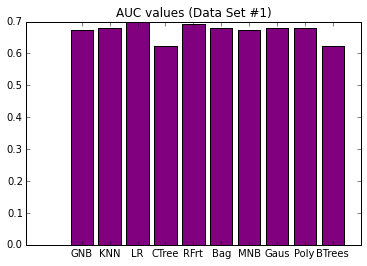

In [135]:
D = {u'MNB':0.674141, u'GNB': 0.674141, u'KNN':0.680614, u'LR':0.699838, u'Poly': 0.679424, \
     u'Gaus':0.681183, u'CTree':0.624381, u'Bag': 0.679540, u'RFrt':0.693678, u'BTrees':0.624381}

plt.bar(range(len(D)), D.values(), align='center', color='purple')
plt.xticks(range(len(D)), D.keys())
plt.title("AUC values (Data Set #1)")
plt.show()

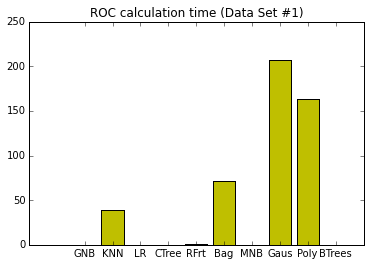

In [155]:
D = {u'MNB':0.058, u'GNB': 0.032, u'KNN':39.389, u'LR':0.266, u'Poly': 163.714, \
     u'Gaus':207.322, u'CTree':0.063, u'Bag': 70.935, u'RFrt':0.875, u'BTrees':0.093}

plt.bar(range(len(D)), D.values(), align='center', color='y')
plt.xticks(range(len(D)), D.keys())
plt.title("ROC calculation time (Data Set #1)")
plt.show()

## Conclusions:
1. In terms of AUC, Logistic Regression (0.699838) is the best, followed by Random Forest (0.693678) and SVM Gaussian Kernel (0.681183).
2. In terms of operation time, Gaussian Naive Bayes (0.032) is the best, followed by Multinomial Naive Bayes (0.058) and Classification Tree (0.063).
3. Generally speaking, Naive Bayes is considered to be the best machine learning method for Data Set #1.

# Data set #2: Musical Instruments

In [68]:
# read json into a DataFrame locally
# reference: https://www.reddit.com/r/MachineLearning/comments/33eglq/python_help_jsoncsv_pandas/

with open('reviews_Musical_Instruments.json', 'rb') as f:
    data = f.readlines()
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"
data_df = pd.read_json(data_json_str)
data_df.head(3)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0006428320,"[0, 0]",3,The portfolio is fine except for the fact that...,"03 11, 2014",A1YS9MDZP93857,John Taylor,Parts missing,1394496000
1,0014072149,"[0, 0]",5,If you are a serious violin student on a budge...,"06 6, 2013",A3TS466QBAWB9D,Silver Pencil,"Perform it with a friend, today!",1370476800
2,0041291905,"[0, 0]",5,This is and excellent edition and perfectly tr...,"10 14, 2013",A3BUDYITWUSIS7,joyce gabriel cornett,Vivalldi's Four Seasons,1381708800


In [69]:
data_df.shape

(189653, 9)

In [70]:
# select response variables is the reviewer’s rating in "overall": 5.0 versus 1.0
review_best_worst = data_df[(data_df.overall==5) | (data_df.overall==1)]
review_best_worst.shape

(131960, 9)

In [85]:
record_best_worst = review_best_worst[:10000]

X = record_best_worst.reviewText
y = record_best_worst.overall
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234567)

vect = CountVectorizer(max_features = 1000)
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)

## Model hyper-parameters optimization

### tuning n_neighbor for KNN

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'n_neighbors': 1}
[ 0.91078562  0.90945406  0.91211718  0.91877497  0.91211718  0.89853138
  0.90921228  0.92389853  0.9012016   0.91855808]
0.911466666667
[0.91146666666666665, 0.88386666666666669, 0.93079999999999996, 0.92720000000000002, 0.93400000000000005, 0.93293333333333328, 0.93426666666666669, 0.93386666666666662, 0.93426666666666669, 0.934666666666666

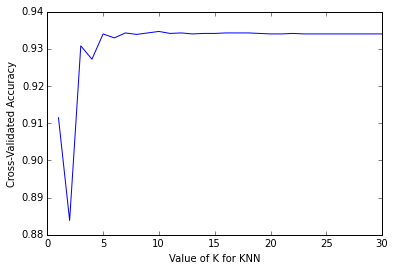

In [88]:
start = time.time()
knn = KNeighborsClassifier()
# define the parameter values that should be searched
k_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(train_dtm, y_train)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
knn_time = end - start
print "duration: %fs" % (knn_time)

In [89]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.934666666667
{'n_neighbors': 10}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')


### tuning C for Logistic Regression

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'C': 1}
[ 0.93874834  0.93608522  0.94274301  0.94274301  0.93608522  0.94526035
  0.94659546  0.94793057  0.94392523  0.94926569]
0.942933333333
[0.94293333333333329, 0.93986666666666663, 0.93773333333333331, 0.93559999999999999, 0.93493333333333328, 0.93386666666666662, 0.93279999999999

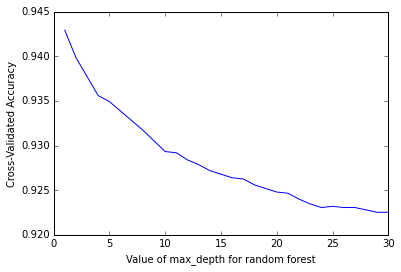

In [121]:
start = time.time()

model = LogisticRegression()
# model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(train_dtm, y_train)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of max_depth for random forest')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
logi_time = end - start
print "duration: %fs" % (logi_time)

In [91]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.942933333333
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


### tuning max_depth for Classification Tree

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'max_depth': 1}
[ 0.9334221   0.9334221   0.9334221   0.9334221   0.9334221   0.93457944
  0.93457944  0.93457944  0.93457944  0.93457944]
0.934
[0.93400000000000005, 0.93400000000000005, 0.93333333333333335, 0.93120000000000003, 0.93146666666666667, 0.92986666666666662, 0.93000000000000005, 0.92959999999999998, 0.929200000000000

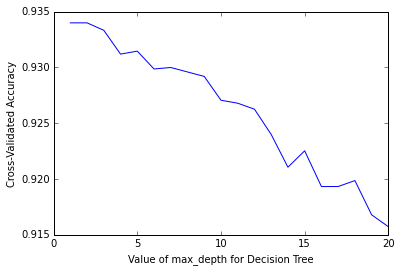

In [93]:
start = time.time()

model = DecisionTreeClassifier()
# define the parameter values that should be searched
test_range = range(1, 21)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(train_dtm, y_train)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
tree_time = end - start
print "duration: %fs" % (tree_time)

In [94]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.934
{'max_depth': 1}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


### tuning n_estimators for Random Forest

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'n_estimators': 1}
[ 0.88015979  0.87616511  0.90279627  0.8828229   0.9081225   0.89319092
  0.88651535  0.88251001  0.88785047  0.90253672]
0.890

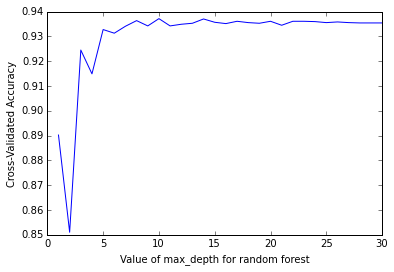

In [95]:
start = time.time()
model = RandomForestClassifier()
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(train_dtm, y_train)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of max_depth for random forest')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
forest_time = end - start
print "duration: %fs" % (forest_time)

In [96]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.9372
{'n_estimators': 10}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### tuning n_estimators for Boosted Trees

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'n_estimators': 1}
[ 0.9334221   0.9334221   0.9334221   0.9334221   0.9334221   0.93457944
  0.93457944  0.93457944  0.93457944  0.93457944]
0.934
[0.93400000000000005, 0.93400000000000005, 0.93413333333333337, 0.93493333333333328, 0.93520000000000003, 0.93533333333333335, 0.93400000000000005, 0.93506666666666671, 0.93466666666666665, 0.93559999999999999, 0.93520000000000003

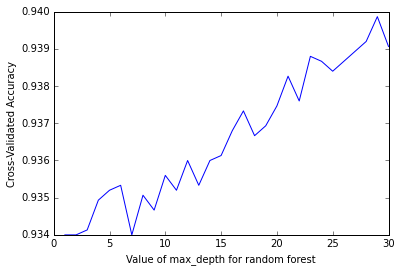

In [111]:
start = time.time()

model = AdaBoostClassifier()
# define the parameter values that should be searched
test_range = range(1,31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(train_dtm, y_train)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of max_depth for random forest')
plt.ylabel('Cross-Validated Accuracy')

boost_time = end - start
print "duration: %fs" % (boost_time)

In [118]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.939866666667
{'n_estimators': 29}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=29, random_state=None)


# ROC and AUC

AUC for Multinomial Naive Bayes: 0.871943	duration: 0.037000
AUC for Gaussian Naive Bayes: 	0.871943	duration: 0.015000
AUC for K-nearest Neighbors: 	0.683279	duration: 3.725000
AUC for Logistic Regression: 	0.889228	duration: 0.431000
AUC for SVM Polynomial Kernel: 	0.806139	duration: 37.796000
AUC for SVM Gaussian Kernel: 	0.901784	duration: 37.539000
AUC for Classification Tree: 	0.545956	duration: 0.068000
AUC for Bagging: 		0.714559	duration: 14.685000
AUC for Random Forest: 		0.749716	duration: 0.671000
AUC for Boosted Trees: 		0.843572	duration: 1.715000


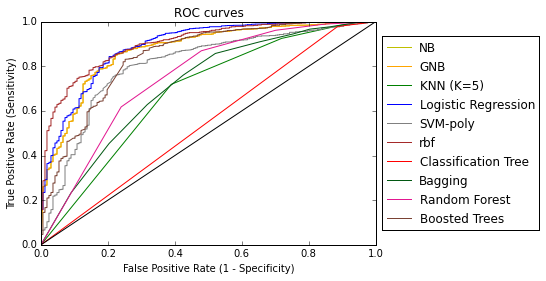

In [119]:
# Define a function to calculate AUC and plot ROC
def rocauc(method):
    Xtrain = train_dtm; Xtest = test_dtm; tit = 'ROC curves'
    global duration
    duration = 0
    start = time.time()
    # tit = 'ROC, feature=\'text\''
    if method == "reg":        
        model = LogisticRegression(C=1)
        tag = 'Logistic Regression'; col = 'b'
    elif method == "nb":        
        model = MultinomialNB()
        tag = 'NB'; col = 'y'
    elif method == "gnb":        
        model = MultinomialNB()
        tag = 'GNB'; col = 'orange'
    elif method == "knn":        
        model = KNeighborsClassifier(n_neighbors=10)
        tag = 'KNN (K=5)'; col = 'g'
    elif method == "tree":
        model = DecisionTreeClassifier(max_depth=1, random_state=1)
        tag = 'Classification Tree'; col = 'r'
    elif method == "svm-poly":
        model = SVC(kernel='poly', probability=True, degree=3)
        tag = 'SVM-poly'; col = 'grey'
    elif method == "rbf":
        model = SVC(kernel='rbf', probability=True)
        tag = 'rbf'; col = 'brown'
    elif method == "bagging":
        model = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
        tag = 'Bagging'; col = '#015812'
    elif method == "forest":
        model = RandomForestClassifier(n_estimators=10)
        tag = 'Random Forest'; col = '#e21790'
    elif method == "boosted":
        model = AdaBoostClassifier(n_estimators=29)
        tag = 'Boosted Trees'; col = '#7a4234'
    # AUC values
    model.fit(Xtrain, y_train)
    y_pred_class = model.predict(Xtest)
    y_pred_prob = model.predict_proba(Xtest)[:, 1]
    y_test_binary = np.where(y_test==5, 1, 0)
    # ROC plot
    fpr, tpr, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
    plt.plot(fpr, tpr, label=tag, color=col)
    plt.legend(loc='lower right')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5), numpoints = 1)
    plt.title(tit)
    # time calculate
    end = time.time()
    duration = end - start
    return metrics.roc_auc_score(y_test_binary, y_pred_prob)

print "AUC for Multinomial Naive Bayes: %f\tduration: %f" % (rocauc("nb"), duration)
print "AUC for Gaussian Naive Bayes: \t%f\tduration: %f" % (rocauc("gnb"), duration)
print "AUC for K-nearest Neighbors: \t%f\tduration: %f" % (rocauc("knn"), duration)
print "AUC for Logistic Regression: \t%f\tduration: %f" % (rocauc("reg"), duration)
print "AUC for SVM Polynomial Kernel: \t%f\tduration: %f" % (rocauc("svm-poly"), duration)
print "AUC for SVM Gaussian Kernel: \t%f\tduration: %f" % (rocauc("rbf"), duration)
print "AUC for Classification Tree: \t%f\tduration: %f" % (rocauc("tree"), duration)
print "AUC for Bagging: \t\t%f\tduration: %f" % (rocauc("bagging"), duration)
print "AUC for Random Forest: \t\t%f\tduration: %f" % (rocauc("forest"), duration)
print "AUC for Boosted Trees: \t\t%f\tduration: %f" % (rocauc("boosted"), duration)
plt.plot([0,1,1], 'black')

# Summary

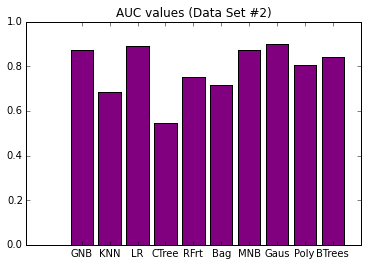

In [122]:
D = {u'MNB':0.871943, u'GNB': 0.871943, u'KNN':0.683279, u'LR':0.889228, u'Poly': 0.806139, \
     u'Gaus':0.901784, u'CTree':0.545956, u'Bag': 0.714559, u'RFrt':0.749716, u'BTrees':0.843572}

plt.bar(range(len(D)), D.values(), align='center', color='purple')
plt.xticks(range(len(D)), D.keys())
plt.title("AUC values (Data Set #2)")
plt.show()

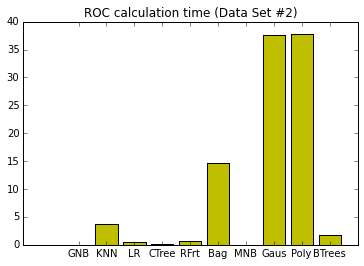

In [123]:
D = {u'MNB':0.037000, u'GNB': 0.015000, u'KNN':3.725000, u'LR':0.431000, u'Poly': 37.796000, \
     u'Gaus':37.539000, u'CTree':0.068000, u'Bag': 14.685000, u'RFrt':0.671000, u'BTrees':1.715000}

plt.bar(range(len(D)), D.values(), align='center', color='y')
plt.xticks(range(len(D)), D.keys())
plt.title("ROC calculation time (Data Set #2)")
plt.show()

## Conclusions:
1. In terms of AUC, SVM Gaussian Kernel (0.901784) is the best, followed by Logistic Regression (0.889228) and Naive Bayes (0.871943).
2. In terms of operation time, Gaussian Naive Bayes (0.015) is the best, followed by Multinomial Naive Bayes (0.037) and Classification Tree (0.068).
3. Generally speaking, Naive Bayes is considered to be the best machine learning method for Data Set #2.